# Twitter Data analysis

In [75]:
%load_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv

import time
import tweepy
import os
import pandas as pd
import sys
import modules
from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


## API Setup

In [76]:
auth = tweepy.OAuth2BearerHandler(os.environ["BEARER_TOKEN"])
client = tweepy.Client(bearer_token=os.environ["BEARER_TOKEN"])

## Data fetching

In [72]:
next_token = None
data = []
for i in range(5):
    results = client.search_recent_tweets(
        query="bitcoin lang:en -is:retweet is:verified -@coinbureau -plattform -follow -helpful -#shiba -#doge -#dogecoin", 
        tweet_fields=["created_at", "public_metrics", "entities", "source"],
        expansions="author_id",
        user_fields="description",
        max_results=100,
        next_token=next_token)

    data += results.data
    if 'next_token' in results.meta: 
        next_token = results.meta['next_token']
        time.sleep(0.1)
    else: 
        break

In [73]:
df = pd.DataFrame(data)
df.shape

(499, 7)

In [74]:
for i, row in df.sample(30).iterrows():
    print(row["text"])
    print("\n-----------------------------")

The true value of the crypto market isn’t the trillions its believers suggest, but it’s nothing to sneer at, either https://t.co/bPMsxTk69Q

-----------------------------
I've used Plex long before #Bitcoin launched. Plex is fantastic. I've used Sonarr &amp; Radarr for many years too. These are great applications. It's great to have more tech choices for the sovereign individual. https://t.co/FII8b5DT2D

-----------------------------
Do we call this the start of a new extension lower? 

#bitcoin #btcusd #Crypto #Cryptocurency https://t.co/zHWN3FwBnX

-----------------------------
UPDATE: Nigeria to Establish Special Economic Zone For #Bitcoin, #Crypto

https://t.co/Gnc0n9lX8w
#News Cryptocurrency

-----------------------------
Crypto market sinks below US$1 trillion, Bitcoin nears 2022 low #FMTNews https://t.co/9p0o4rMjBO

-----------------------------
#bitcoin, the mood today... https://t.co/NSPY9mbsXr

-----------------------------
#Bitcoin trades below $19,000, with global market ca

### Save data

In [ ]:
df.to_feather("bitcoin_tweets")

### Load data

In [3]:
df = pd.read_feather("bitcoin_tweets")

In [4]:
df.head()

,author_id,created_at,entities,id,public_metrics,source,text
0,48468639,2022-09-06 10:19:53+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1567095233472520192,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",Twitter for iPhone,@Bitcoin_ator Where is this beautiful beach?
1,1059769354030592008,2022-09-06 10:19:52+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1567095229106241536,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",Hootsuite Inc.,Have you ever wanted to play a slot built into...
2,1550142848963682306,2022-09-06 10:19:51+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1567095225603997697,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",Twitter for Android,@NatureGlitch @coinbureau I never taught I cou...
3,1368565107870031873,2022-09-06 10:19:51+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1567095224341610497,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",Twitter for Android,@BusinessLiveSA Being the head of the home isn...
4,1489204459683123203,2022-09-06 10:19:50+00:00,"{'annotations': [{'end': 8, 'normalized_text':...",1567095220688375810,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",IFTTT,BlackRock to team up with Kraken’s crypto inde...


## Data description

In [5]:
df.shape

(19981, 7)

Create new columns in the same data frame

In [18]:
df["length"] = df["text"].str.len()
df["word_count"] = df["text"].str.split().str.len()

def print_distribution(s: pd.Series):
    display(s.describe())
    display(s.hist(bins=50))


#### Tweet length distribution

count    19981.000000
mean       195.159051
std         81.084059
min          7.000000
25%        131.000000
50%        200.000000
75%        272.000000
max        576.000000
Name: length, dtype: float64

<AxesSubplot:>

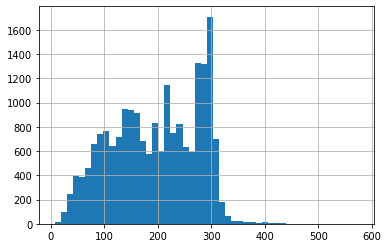

In [20]:
# total charcaters distribution
print_distribution(df["length"])

count    19981.000000
mean        26.867474
std         13.399620
min          1.000000
25%         16.000000
50%         24.000000
75%         38.000000
max         73.000000
Name: word_count, dtype: float64

<AxesSubplot:>

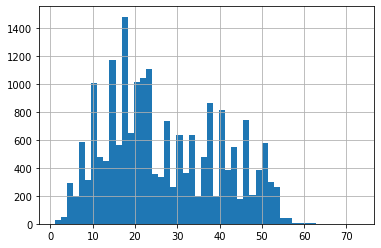

In [21]:
# total words distribution
print_distribution(df["word_count"])

## Text cleaning and preprocessing

In [40]:
import nltk
import seaborn as sns
from modules.contractions import expand_contractions
from nltk.corpus import stopwords
from collections import  Counter
# nltk.download('stopwords')


In [41]:
# remove #hashtags from words to avoid duplicates in word dictionarys
df["norm_text"] = df["text"].apply(expand_contractions)

In [42]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.lower().str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

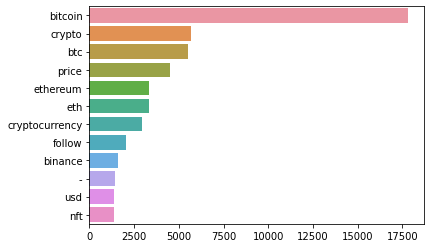

In [43]:
plot_top_non_stopwords_barchart(df['norm_text'])